In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [36]:
data = pd.read_csv("/content/train.csv")
data_test = pd.read_csv("/content/test.csv")

In [37]:
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [54]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [39]:
data_test.drop('Id',axis=1,inplace=True)
data.drop('Id',axis=1,inplace=True)

In [40]:
categorical_features = data.select_dtypes(include='object').columns
categorical_features

Index(['cut', 'color', 'clarity'], dtype='object')

In [41]:
categorical_features_test = data_test.select_dtypes(include='object').columns
categorical_features_test

Index(['cut', 'color', 'clarity'], dtype='object')

In [42]:
#custom encoder
data_1=data.copy()
cut_map={"Fair": 1 ,"Good": 2 ,"Very Good": 3 , "Premium": 4 , "Ideal": 5 }
encoded_cut = data_1['cut'].map(cut_map)
data_1['cut']=encoded_cut
#color
color_map={"J": 1 ,"I": 2 ,"H": 3 , "G": 4 , "F": 5 , "E": 6 , "D":7 }
encoded_color = data_1['color'].map(color_map)
data_1['color']=encoded_color
#clarity
clarity_map={"I1": 1 ,"SI2": 2 ,"SI1": 3 , "VS2": 4 , "VS1": 5 , "VVS2": 6 , "VVS1":7 , "IF":8}
encoded_clarity = data_1['clarity'].map(clarity_map)
data_1['clarity']=encoded_clarity

data_2=data_1.copy()

In [43]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  int64  
 2   color    43152 non-null  int64  
 3   clarity  43152 non-null  int64  
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [54]:
#log scale
log_features = data_2.select_dtypes(include=['float64']).columns

X_train_log_scaled = data_2.copy()

X_train_log_scaled[log_features] = np.log1p(data_2[log_features])



In [55]:
log_features

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [59]:
X_train_log_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  int64  
 2   color    43152 non-null  int64  
 3   clarity  43152 non-null  int64  
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [56]:
#log scaled
x=X_train_log_scaled.drop(['price','depth'],axis=1)
y=X_train_log_scaled['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

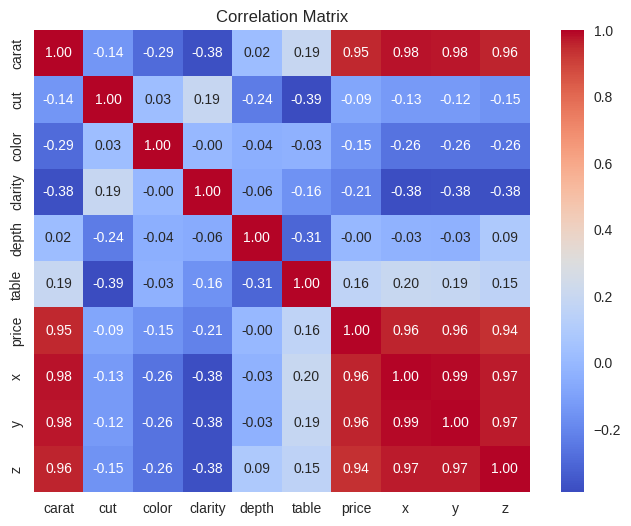

In [102]:
plt.figure(figsize=(8, 6))

sns.heatmap(X_train_log_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
!pip install catboost


In [47]:
from catboost import CatBoostRegressor

In [57]:
catBoost = CatBoostRegressor(iterations=500, learning_rate=0.1, loss_function='RMSE')

In [64]:
catBoost.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)


0:	learn: 3648.6031276	test: 3589.3603486	best: 3589.3603486 (0)	total: 75ms	remaining: 37.4s
100:	learn: 547.6056157	test: 551.6251269	best: 551.6251269 (100)	total: 2.71s	remaining: 10.7s
200:	learn: 510.8456597	test: 531.9469133	best: 531.9469133 (200)	total: 4.14s	remaining: 6.16s
300:	learn: 485.9935097	test: 523.3724519	best: 523.2152767 (296)	total: 5.6s	remaining: 3.71s
400:	learn: 468.0730676	test: 519.4900555	best: 519.4861516 (398)	total: 7.7s	remaining: 1.9s
499:	learn: 454.8067675	test: 517.6306918	best: 517.3948364 (494)	total: 9.77s	remaining: 0us

bestTest = 517.3948364
bestIteration = 494

Shrink model to first 495 iterations.


In [65]:
y_pred = catBoost.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)  # Import numpy (np) if you haven't already
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 517.394836413038
